In [1]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [45]:
insurance = pd.read_csv('insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [46]:
#### Task #1: clean up the data -- done
#### - looking at missing values
#### - standardise the columns eg. region and charges and data type
#### - might need to remove duplicates
#### - change some columns to boolean

insurance_filled = insurance.dropna()

insurance_filled['region'] = insurance_filled['region'].str.lower()

insurance_filled['sex'].unique()
FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'M': MALE, 'man': MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float')


insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
insurance_pos.to_csv('cleaned-insurance.csv', index = False)



/var/folders/8_/vymgqhsx4bs4jk73k02625140000gn/T/ipykernel_43538/4177697860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
/var/folders/8_/vymgqhsx4bs4jk73k02625140000gn/T/ipykernel_43538/4177697860.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
/var/folders/8_/vymgqhsx4bs4jk73k02625140000gn/T/ipykernel_43538/4177697860.py:18: SettingWithCopyWarning: 
A value is t

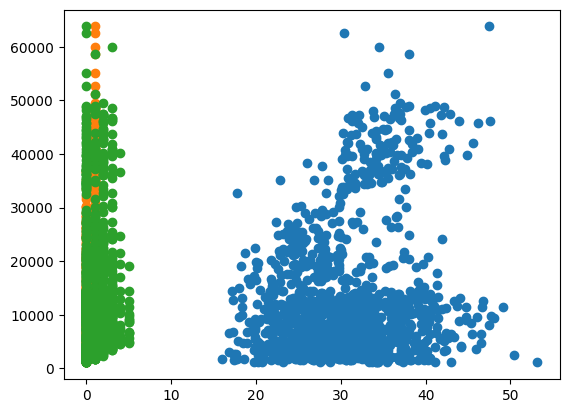

In [60]:
#### Task #2: scatter plot of relationship between indipendent variables with response variable

import matplotlib.pyplot as plt
df = insurance_pos.copy()
plt.scatter(df['bmi'], df['charges'])
plt.scatter(df['smoker'], df['charges'])
plt.scatter(df['children'], df['charges'])

In [65]:
#### task #3: prepare the data for model fitting
# we could manual do dummy incoding for each region or use the pandas formula

df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new.drop(['region_southeast'], axis=1, inplace=True)

#df_new['region_northeast'] = df_new['region_northeast'].apply(lambda x: 1 if x else 0)
#df_new['region_northwest'] = df_new['region_northwest'].apply(lambda x: 1 if x else 0)
#df_new['region_southwest'] = df_new['region_southwest'].apply(lambda x: 1 if x else 0)

df_new['smoker'] = df_new['smoker'].astype('int64')
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')

df_new.dropna(inplace = True)
df_new.drop(['sex'], axis=1, inplace=True)

In [58]:
df_new

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,27.900,0.0,0,16884.92400,False,False,True
1,18.0,33.770,1.0,0,1725.55230,False,False,False
2,28.0,33.000,3.0,0,4449.46200,False,False,False
3,33.0,22.705,0.0,0,21984.47061,False,True,False
4,32.0,28.880,0.0,0,3866.85520,False,True,False
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0,10600.54830,False,True,False
1334,18.0,31.920,0.0,0,2205.98080,True,False,False
1335,18.0,36.850,0.0,0,1629.83350,False,False,False
1336,21.0,25.800,0.0,0,2007.94500,False,False,True


In [74]:
####task #5: linear regression
#defining the variables
X = df_new.drop(columns = ['charges'])
y = df_new['charges']

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create and train linear model
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction on the test set
y_pred = model.predict(X_test)

#calculate the R squared
r2 = r2_score(y_test, y_pred)

r2

0.7049323160872818

In [91]:
def processing(df):
    
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new.drop(['region_southeast'], axis=1, inplace=True)
    
    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')
    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    
    df_new.dropna(inplace = True)
    df_new.drop(['sex'], axis=1, inplace=True)
    
    return df_new

In [97]:
#implement model creation and training
#task 6 see how the model perform on validation dataset

val_df = pd.read_csv('validation_dataset.csv')
validation = processing(val_df)

predictions = model.predict(validation)
prediction_new = [x if x>0 else 1000 for x in predictions]
validation_data = val_df.copy()

validation_data['predicted_cahrges'] = prediction_new
validation_data

,age,sex,bmi,children,smoker,region,predicted_cahrges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
